## edX IBM data science project: Question 1

### Exploratory Data Analysis on the approximately 10 million 311 housing complaints found on the NYC Department of Housing Preservation and Development dataset.

### Question 1: Find the most common complaint in the 311, NYC DHPD dataset.  What type of complaint should NYC DHP focus on?

In [1]:
import pandas as pd

# import dataset
df = pd.read_csv("fhrw-4uyv.csv")

In [2]:
# return a Series object of the instances of each type of complaint
df.complaint_type.value_counts()

HEAT/HOT WATER            1146190
HEATING                    887869
PLUMBING                   698569
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       427586
PAINT - PLASTER            361258
PAINT/PLASTER              338392
ELECTRIC                   300757
NONCONST                   260890
DOOR/WINDOW                197406
WATER LEAK                 184296
GENERAL                    144003
FLOORING/STAIRS            134293
APPLIANCE                  108238
HPD Literature Request      54245
SAFETY                      49220
OUTSIDE BUILDING             6954
ELEVATOR                     6265
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

### As the question statement suggests, 'HEAT/HOT WATER' and 'HEATING' are to be considered the same type of request, so we'll merge those two labels and store the result as a Series

In [3]:
df.complaint_type.replace("HEATING", "HEAT/HOT WATER", inplace = True)
print(df.complaint_type.value_counts().head(3))
cc = df.complaint_type.value_counts()

HEAT/HOT WATER          2034059
PLUMBING                 698569
GENERAL CONSTRUCTION     500863
Name: complaint_type, dtype: int64


### Charts of complaint types of NYC 311 calls over the dataset period

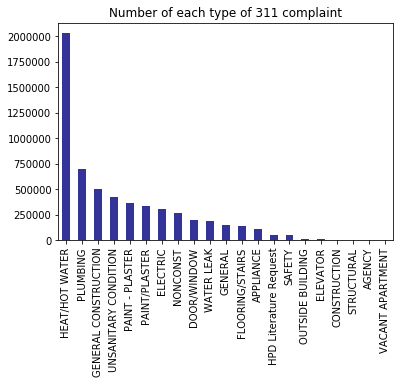

In [12]:
cc.plot(kind='bar', title='Number of each type of 311 complaint', colormap = 'terrain')

In [14]:
complaint_sum = cc.sum()
# Expressed as percentages
print(round(100.0*cc/complaint_sum, 3))

HEAT/HOT WATER            34.995
PLUMBING                  12.019
GENERAL CONSTRUCTION       8.617
UNSANITARY CONDITION       7.356
PAINT - PLASTER            6.215
PAINT/PLASTER              5.822
ELECTRIC                   5.174
NONCONST                   4.489
DOOR/WINDOW                3.396
WATER LEAK                 3.171
GENERAL                    2.478
FLOORING/STAIRS            2.310
APPLIANCE                  1.862
HPD Literature Request     0.933
SAFETY                     0.847
OUTSIDE BUILDING           0.120
ELEVATOR                   0.108
CONSTRUCTION               0.087
STRUCTURAL                 0.000
AGENCY                     0.000
VACANT APARTMENT           0.000
Name: complaint_type, dtype: float64


### All the world hates a pie chart these days, but it seems appropriate here, so why not?

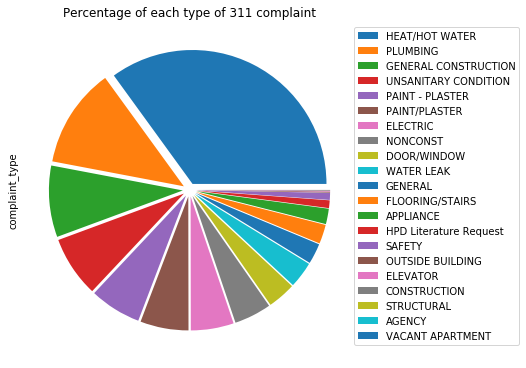

In [15]:
tt = 'Percentage of each type of 311 complaint'
ax = (100.0*cc/complaint_sum).plot(kind='pie', explode = [0.05]*21, title= tt, figsize=(6, 8), labels=None)
ax.legend(cc.index, loc = "best", bbox_to_anchor=(1, 0, 0.5, 1))

### Analysis
Clearly, heating issues are the most common complaint.  They comprise almost exactly 35% of the complaints, with the next most common complaint having a 12% frequency.  

I do, however, feel compelled to point out that the phrasing of the question is:

##### Question 1 - Which type of complaints should the Department of Housing Preservation and Development of New York City focus on first?

The most common complaint might not be the most important one to focus on, for example electrical, safety, or structural problems might have severe consequences for the occupants and be more critical, even if they are less frequent than heating issues.  An actual subject matter expert would be needed to assess this.

#### But, yes, the answer that is being sought is "Heating Issues," at just over 2 million complains and 35% of the total volume of calls.